In [682]:
#思路：
#       1.根据评论内容的情感分析预测评分(1-5)
#       2.根据评论内容的词频，得到积极评论中词频最高的几个词 和 消极评论中词频最高的几个词分别是什么
#       3.根据高频词提出优化迭代建议，做的好的方面持续精进，做的不好的方面努力改正

In [683]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [684]:
uber = pd.read_csv('Uber_Ride_Reviews.csv')

In [685]:
uber.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


In [686]:
uber.describe()

,ride_rating,sentiment
count,1344.000000,1344.000000
mean,1.627232,0.173363
std,1.296149,0.378702
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,5.000000,1.000000


In [687]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 3 columns):
ride_review    1344 non-null object
ride_rating    1344 non-null float64
sentiment      1344 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 31.6+ KB


In [688]:
uber['ride_rating'].unique()

array([1., 2., 3., 4., 5.])

In [689]:
uber['sentiment'].unique()

array([0, 1])

In [690]:
uber.shape[0]

1344

Text(0,0.5,'Counts')

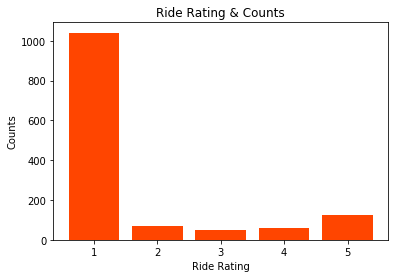

In [691]:
plt.bar(uber['ride_rating'].value_counts().index.values,uber['ride_rating'].value_counts().values,color='orangered',label='ride_rating')
plt.title('Ride Rating & Counts')
plt.xlabel('Ride Rating')
plt.ylabel('Counts')

In [692]:
satisfied_rate = uber['sentiment'].value_counts().values[-1] / uber.shape[0]
print('satisfied_rate:',satisfied_rate)

satisfied_rate: 0.17336309523809523


In [693]:
uber['ride_rating'].value_counts()

1.0    1041
5.0     124
2.0      70
4.0      59
3.0      50
Name: ride_rating, dtype: int64

In [694]:
blob.sentences[0].sentiment

Sentiment(polarity=0.2291666666666667, subjectivity=0.6583333333333333)

In [695]:
blob.sentiment

Sentiment(polarity=0.2291666666666667, subjectivity=0.6583333333333333)

情感极性0.15，主观性1.0。情感极性的变化范围是 [-1,1], -1代表完全负面，1代表完全正面。

In [696]:
texts = uber['ride_review'].values
blobs_pol = []
blobs_sub = []
for text in texts:
    blob = TextBlob(text)
    blobs_pol.append(blob.sentiment.polarity)
    blobs_sub.append(blob.sentiment.subjectivity)

In [697]:
uber['polarity_score'] = blobs_pol
uber['subjective_score'] = blobs_sub

In [698]:
uber.head()

,ride_review,ride_rating,sentiment,polarity_score,subjective_score
0,I completed running New York Marathon requeste...,1.0,0,0.074946,0.416259
1,My appointment time auto repairs required earl...,1.0,0,0.228788,0.543333
2,Whether I using Uber ride service Uber Eats or...,1.0,0,-0.145000,0.431389
3,Why hard understand I trying retrieve Uber cab...,1.0,0,0.128451,0.475084
4,I South Beach FL I staying major hotel ordered...,1.0,0,0.004503,0.379167


In [699]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 5 columns):
ride_review         1344 non-null object
ride_rating         1344 non-null float64
sentiment           1344 non-null int64
polarity_score      1344 non-null float64
subjective_score    1344 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 52.6+ KB


# USING RANDOM FOREST CLASSIFIER TO PREDICT  THE RIDE_RATING

In [700]:
X = uber.drop(['ride_rating','ride_review'],axis=1)
y = uber['ride_rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [701]:
from sklearn.ensemble import RandomForestClassifier

In [702]:
alg = RandomForestClassifier()

In [703]:
alg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [704]:
prediction = alg.predict(X_test)

In [705]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

        1.0       0.92      0.99      0.96       326
        2.0       0.00      0.00      0.00        28
        3.0       0.43      0.50      0.47        20
        4.0       0.20      0.18      0.19        22
        5.0       0.62      0.60      0.61        48

avg / total       0.77      0.83      0.80       444



精确度是“搜索结果有多大用处”，而召回是“结果如何完整”。

精确度和召回率都高时， F1值也会高． F1值在1时达到最佳值（完美的精确度和召回率），最差为0．在二元分类中， F1值是测试准确度的量度。

In [706]:
print(confusion_matrix(y_test,prediction))

[[324   2   0   0   0]
 [ 28   0   0   0   0]
 [  0   0  10   4   6]
 [  0   0   6   4  12]
 [  0   0   7  12  29]]


# USING LOGISTIC REGRESSION TO PREDICT  THE RIDE_RATING

In [707]:
X = uber.drop(['ride_rating','ride_review'],axis=1)
y = uber['ride_rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [708]:
from sklearn.linear_model import LogisticRegression

In [709]:
alg = LogisticRegression()

In [710]:
alg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [711]:
prediction = alg.predict(X_test)

In [712]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

        1.0       0.95      1.00      0.97       344
        2.0       0.00      0.00      0.00        19
        3.0       1.00      0.05      0.10        19
        4.0       0.00      0.00      0.00        26
        5.0       0.45      1.00      0.62        36

avg / total       0.81      0.86      0.81       444



/Users/holden/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [713]:
print(confusion_matrix(y_test,prediction))

[[344   0   0   0   0]
 [ 19   0   0   0   0]
 [  0   0   1   0  18]
 [  0   0   0   0  26]
 [  0   0   0   0  36]]


# 词频

In [714]:
sentences_pos = uber[uber['sentiment'] > .5]['ride_review'].value_counts().index.values.tolist()

In [715]:
dic1 = {}
for sentence in sentences_pos:
    list1 = sentence.split()
    set1 = set(list1)
    list2 = list(set1)
    for x in range(len(list2)):
        dic1[list2[x]] = 0
        for y in range(len(list1)):
            if list2[x] == list1[y]:
                dic1[list2[x]] += 1

In [716]:
pos_words = pd.DataFrame(dic1,index=['counts'])

In [717]:
pos_words = pos_words.T

In [718]:
pos_words['counts'].value_counts()

1    2740
2     155
3      19
4      13
5       2
8       1
Name: counts, dtype: int64

In [719]:
sentences_neg = uber[uber['sentiment'] < .5]['ride_review'].value_counts().index.values.tolist()

In [720]:
dic2 = {}
for sentence in sentences_neg:
    list1 = sentence.split()
    set1 = set(list1)
    list2 = list(set1)
    for x in range(len(list2)):
        dic2[list2[x]] = 0
        for y in range(len(list1)):
            if list2[x] == list1[y]:
                dic2[list2[x]] += 1
dic2['uber']

1

In [721]:
neg_words = pd.DataFrame(dic2,index=['counts'])

In [722]:
neg_words = neg_words.T

In [741]:
neg_words[neg_words['counts']>=13].index.values

array(['I', 'damage', 'Danielle'], dtype=object)

In [742]:
pos_words[pos_words['counts']>=5].index.values

array(['responded', 'Kansas', 'application'], dtype=object)

结论：在积极和消极评论中，排名前三的高频词汇均未不具有较高的特殊性